In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('default')

subset = pd.read_feather('subset_full_results.feather')
xg_results = pd.read_feather('xg_results.feather')

In [2]:
xg_results.head()

,start,duration,text,sponsored,combined_text,expected,prediction,prediction_raw
807,0.03,2.820,this video sponsored by sheets and,True,this video sponsored by sheets and giggles mor...,0.500000,0,0.125202
808,1.50,3.990,giggles more on them at the end of the,True,giggles more on them at the end of the sketch ...,0.333333,0,0.005730
809,2.85,3.390,sketch hey hey man hey hey you look,True,sketch hey hey man hey hey you look different ...,0.166667,0,0.220844
810,5.49,2.369,different,False,different oh yeah yeah see im actually not cov...,0.000000,0,0.181572
811,6.24,3.029,oh yeah yeah see im actually not,False,oh yeah yeah see im actually not covered in fi...,0.000000,0,0.010176


In [3]:
subset.head()

,start,duration,text,sponsored,combined_text,expected,hermes-3-llama-3.2-3b_Zero_Shot,hermes-3-llama-3.2-3b_One_Shot,hermes-3-llama-3.2-3b_CARP-LESS,meta-llama-3.1-8b-instruct_Zero_Shot,...,granite-3.2-8b-instruct_One_Shot,granite-3.2-8b-instruct_CARP-LESS,gemma-3-27b-it_Zero_Shot,gemma-3-27b-it_One_Shot,gemma-3-27b-it_CARP-LESS,deepseek-r1-distill-qwen-7b_Zero_Shot,deepseek-r1-distill-qwen-7b_One_Shot,deepseek-r1-distill-qwen-7b_CARP-LESS,xg_prediction,xg_prediction_raw
0,7.880,5.509,welcome welcome everyone and congratulations,True,welcome welcome everyone and congratulations i...,0.166667,True,True,False,True,...,True,True,True,True,True,True,True,True,True,0.894055
1,300.639,3.521,again thank you to trade coffee for,True,again thank you to trade coffee for sponsoring...,0.333333,True,True,False,True,...,True,True,True,True,True,True,True,False,False,0.011293
2,777.740,3.810,havent seen gigging like that since i,False,havent seen gigging like that since i was a fr...,0.000000,True,False,False,None,...,False,False,True,False,False,True,False,True,False,0.011425
3,455.509,3.480,its gone boom and its gone it doesnt,False,its gone boom and its gone it doesnt tell me i...,0.000000,None,False,False,None,...,True,False,True,True,False,True,True,True,True,0.320752
4,610.060,3.709,if you could just add more hotbar slots it\nwo...,False,if you could just add more hotbar slots it\nwo...,0.000000,True,False,False,None,...,False,False,True,False,False,False,False,False,False,0.006862


ROC Graphs

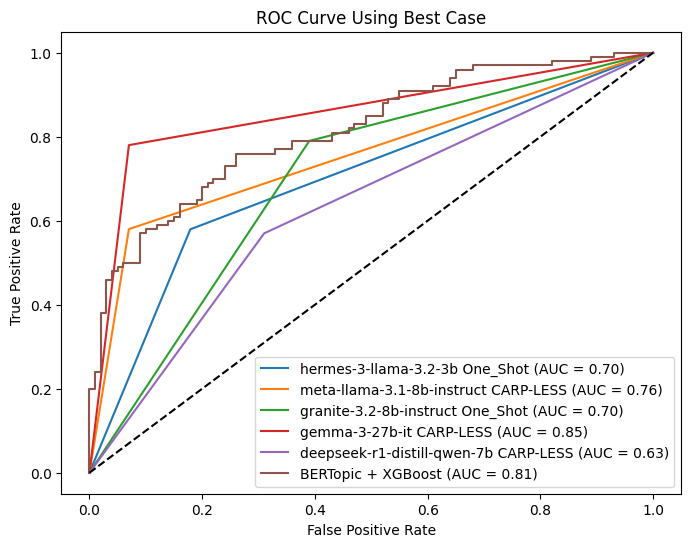

In [12]:
# Subset results

from sklearn.metrics import roc_curve, auc

def safe_roc_plot(y_true, y_probs, label):
    # Drop rows where y_probs is NaN
    mask = ~pd.isna(y_probs)
    y_true_clean = y_true[mask]
    y_probs_clean = y_probs[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    fpr, tpr, _ = roc_curve(y_true_clean, y_probs_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
safe_roc_plot(subset['sponsored'], subset['hermes-3-llama-3.2-3b_One_Shot'], "hermes-3-llama-3.2-3b One_Shot")
safe_roc_plot(subset['sponsored'], subset['meta-llama-3.1-8b-instruct_CARP-LESS'], "meta-llama-3.1-8b-instruct CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['granite-3.2-8b-instruct_One_Shot'], "granite-3.2-8b-instruct One_Shot")
safe_roc_plot(subset['sponsored'], subset['gemma-3-27b-it_CARP-LESS'], "gemma-3-27b-it CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['deepseek-r1-distill-qwen-7b_CARP-LESS'], "deepseek-r1-distill-qwen-7b CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using Best Case')
plt.legend()
plt.show()


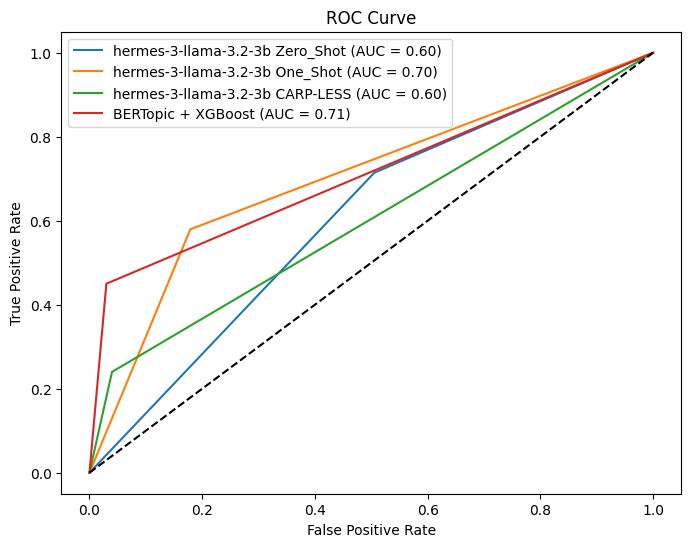

In [5]:
# hermes results

from sklearn.metrics import roc_curve, auc

def safe_roc_plot(y_true, y_probs, label):
    # Drop rows where y_probs is NaN
    mask = ~pd.isna(y_probs)
    y_true_clean = y_true[mask]
    y_probs_clean = y_probs[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    fpr, tpr, _ = roc_curve(y_true_clean, y_probs_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
safe_roc_plot(subset['sponsored'], subset['hermes-3-llama-3.2-3b_Zero_Shot'], "hermes-3-llama-3.2-3b Zero_Shot")
safe_roc_plot(subset['sponsored'], subset['hermes-3-llama-3.2-3b_One_Shot'], "hermes-3-llama-3.2-3b One_Shot")
safe_roc_plot(subset['sponsored'], subset['hermes-3-llama-3.2-3b_CARP-LESS'], "hermes-3-llama-3.2-3b CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

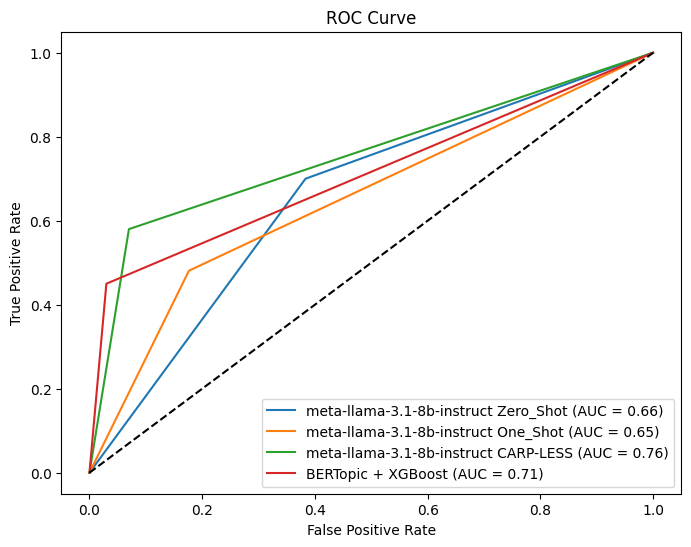

In [6]:
# llama 3.1 8b results

from sklearn.metrics import roc_curve, auc

def safe_roc_plot(y_true, y_probs, label):
    # Drop rows where y_probs is NaN
    mask = ~pd.isna(y_probs)
    y_true_clean = y_true[mask]
    y_probs_clean = y_probs[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    fpr, tpr, _ = roc_curve(y_true_clean, y_probs_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
safe_roc_plot(subset['sponsored'], subset['meta-llama-3.1-8b-instruct_Zero_Shot'], "meta-llama-3.1-8b-instruct Zero_Shot")
safe_roc_plot(subset['sponsored'], subset['meta-llama-3.1-8b-instruct_One_Shot'], "meta-llama-3.1-8b-instruct One_Shot")
safe_roc_plot(subset['sponsored'], subset['meta-llama-3.1-8b-instruct_CARP-LESS'], "meta-llama-3.1-8b-instruct CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

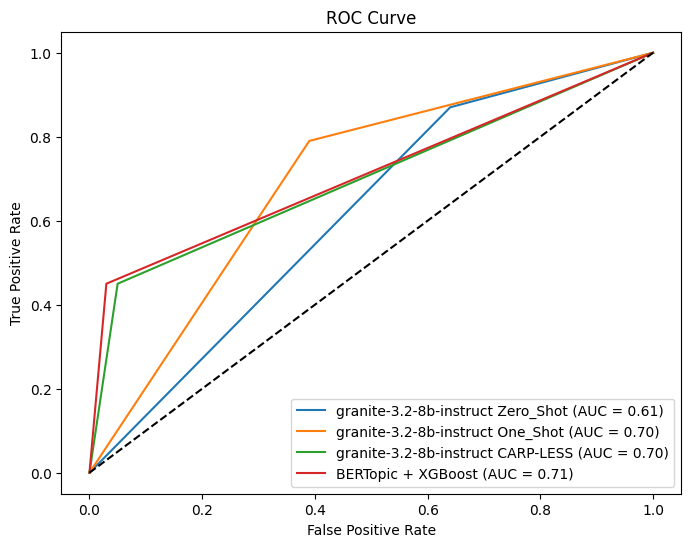

In [7]:
# granite results

from sklearn.metrics import roc_curve, auc

def safe_roc_plot(y_true, y_probs, label):
    # Drop rows where y_probs is NaN
    mask = ~pd.isna(y_probs)
    y_true_clean = y_true[mask]
    y_probs_clean = y_probs[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    fpr, tpr, _ = roc_curve(y_true_clean, y_probs_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
safe_roc_plot(subset['sponsored'], subset['granite-3.2-8b-instruct_Zero_Shot'], "granite-3.2-8b-instruct Zero_Shot")
safe_roc_plot(subset['sponsored'], subset['granite-3.2-8b-instruct_One_Shot'], "granite-3.2-8b-instruct One_Shot")
safe_roc_plot(subset['sponsored'], subset['granite-3.2-8b-instruct_CARP-LESS'], "granite-3.2-8b-instruct CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

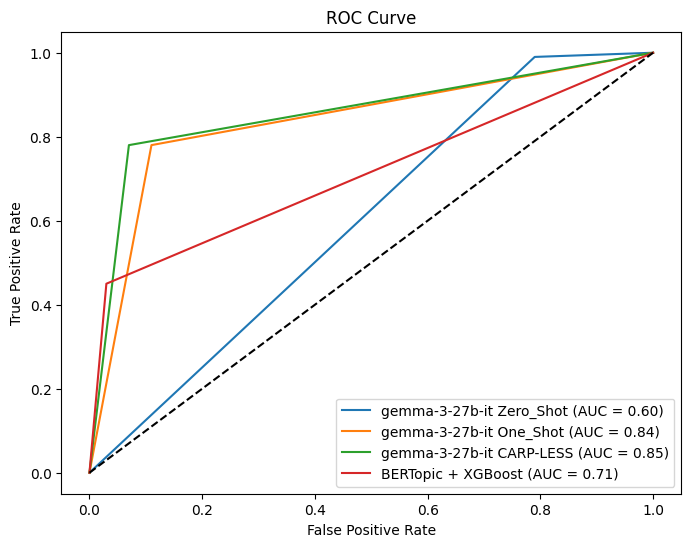

In [8]:
# gemma results

from sklearn.metrics import roc_curve, auc

def safe_roc_plot(y_true, y_probs, label):
    # Drop rows where y_probs is NaN
    mask = ~pd.isna(y_probs)
    y_true_clean = y_true[mask]
    y_probs_clean = y_probs[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    fpr, tpr, _ = roc_curve(y_true_clean, y_probs_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
safe_roc_plot(subset['sponsored'], subset['gemma-3-27b-it_Zero_Shot'], "gemma-3-27b-it Zero_Shot")
safe_roc_plot(subset['sponsored'], subset['gemma-3-27b-it_One_Shot'], "gemma-3-27b-it One_Shot")
safe_roc_plot(subset['sponsored'], subset['gemma-3-27b-it_CARP-LESS'], "gemma-3-27b-it CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

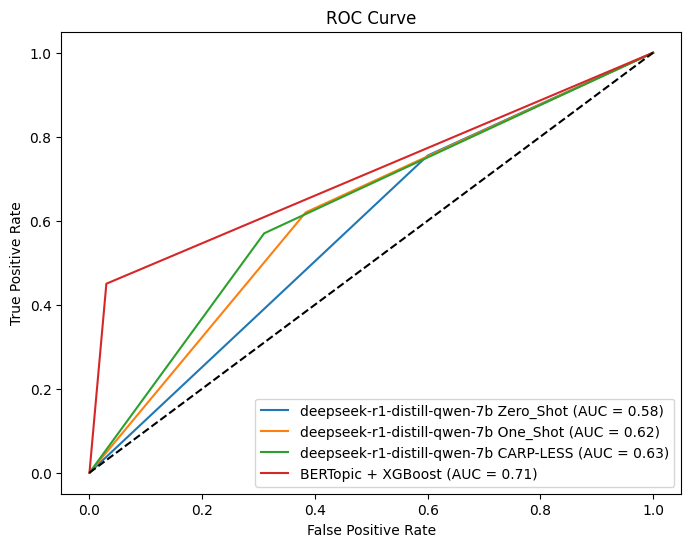

In [11]:
# gemma results

from sklearn.metrics import roc_curve, auc

def safe_roc_plot(y_true, y_probs, label):
    # Drop rows where y_probs is NaN
    mask = ~pd.isna(y_probs)
    y_true_clean = y_true[mask]
    y_probs_clean = y_probs[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    fpr, tpr, _ = roc_curve(y_true_clean, y_probs_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')


plt.figure(figsize=(8, 6))
safe_roc_plot(subset['sponsored'], subset['deepseek-r1-distill-qwen-7b_Zero_Shot'], "deepseek-r1-distill-qwen-7b Zero_Shot")
safe_roc_plot(subset['sponsored'], subset['deepseek-r1-distill-qwen-7b_One_Shot'], "deepseek-r1-distill-qwen-7b One_Shot")
safe_roc_plot(subset['sponsored'], subset['deepseek-r1-distill-qwen-7b_CARP-LESS'], "deepseek-r1-distill-qwen-7b CARP-LESS")
safe_roc_plot(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

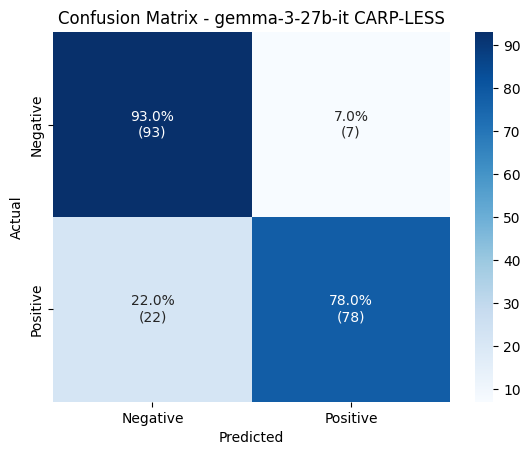

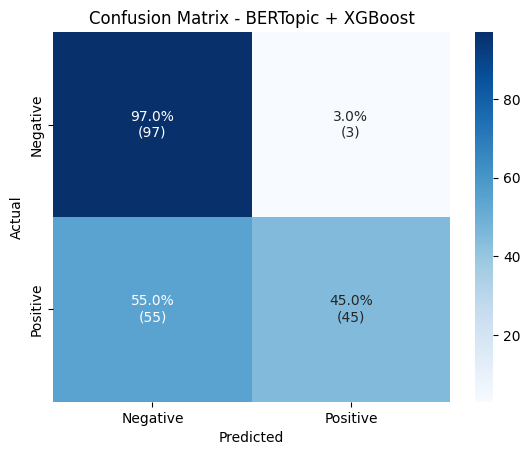

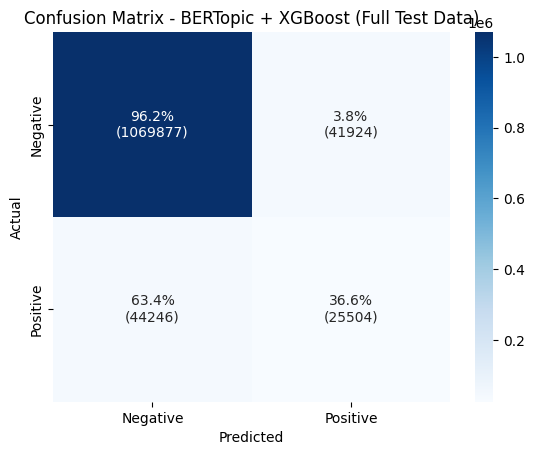

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true, y_pred, label):
    mask = ~pd.isna(y_pred)
    y_true_clean = y_true[mask]
    y_preds_clean = y_pred[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    
    cm = confusion_matrix(y_true_clean, y_preds_clean)
    
        # Convert to percentage
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_percent = np.nan_to_num(cm_percent)  # handle division by zero

    annot = np.array([
        [f"{p:.1f}%\n({c})" for p, c in zip(row_p, row)]
        for row_p, row in zip(cm_percent, cm)
    ])
    

    sns.heatmap(cm,  annot=annot, fmt="", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {label}')
    plt.show()

plot_confusion_matrix(subset['sponsored'], subset['gemma-3-27b-it_CARP-LESS'], "gemma-3-27b-it CARP-LESS")
plot_confusion_matrix(subset['sponsored'], subset['xg_prediction'], "BERTopic + XGBoost")
plot_confusion_matrix(xg_results['sponsored'], xg_results['prediction'], "BERTopic + XGBoost (Full Test Data)")


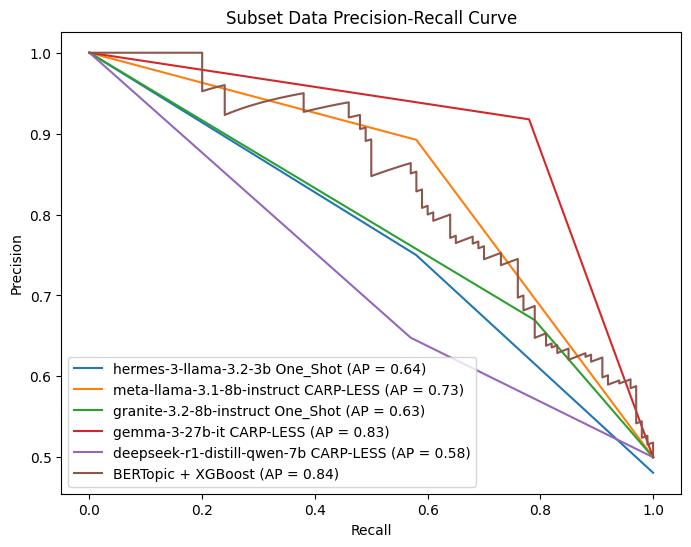

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr_curve(y_true, y_scores, label):
    mask = ~pd.isna(y_scores)
    y_true_clean = y_true[mask]
    y_probs_clean = y_scores[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    precision, recall, _ = precision_recall_curve(y_true_clean, y_probs_clean)
    avg_prec = average_precision_score(y_true_clean, y_probs_clean)
    plt.plot(recall, precision, label=f'{label} (AP = {avg_prec:.2f})')

plt.figure(figsize=(8, 6))
plot_pr_curve(subset['sponsored'], subset['hermes-3-llama-3.2-3b_One_Shot'], "hermes-3-llama-3.2-3b One_Shot")
plot_pr_curve(subset['sponsored'], subset['meta-llama-3.1-8b-instruct_CARP-LESS'], "meta-llama-3.1-8b-instruct CARP-LESS")
plot_pr_curve(subset['sponsored'], subset['granite-3.2-8b-instruct_One_Shot'], "granite-3.2-8b-instruct One_Shot")
plot_pr_curve(subset['sponsored'], subset['gemma-3-27b-it_CARP-LESS'], "gemma-3-27b-it CARP-LESS")
plot_pr_curve(subset['sponsored'], subset['deepseek-r1-distill-qwen-7b_CARP-LESS'], "deepseek-r1-distill-qwen-7b CARP-LESS")
plot_pr_curve(subset['sponsored'], subset['xg_prediction_raw'], "BERTopic + XGBoost")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Subset Data Precision-Recall Curve')
plt.legend()
plt.show()


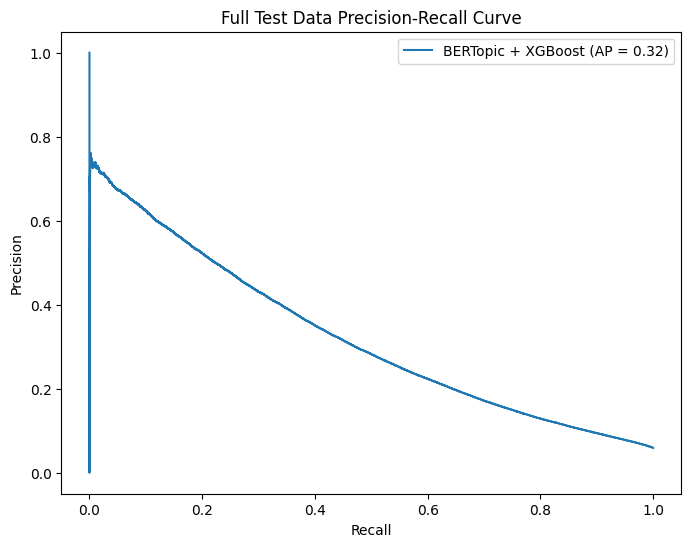

In [18]:
def plot_pr_curve(y_true, y_scores, label):
    mask = ~pd.isna(y_scores)
    y_true_clean = y_true[mask]
    y_probs_clean = y_scores[mask]
    
    if len(set(y_true_clean)) < 2:
        print(f"Skipping {label} – only one class present after filtering.")
        return
    
    precision, recall, _ = precision_recall_curve(y_true_clean, y_probs_clean)
    avg_prec = average_precision_score(y_true_clean, y_probs_clean)
    plt.plot(recall, precision, label=f'{label} (AP = {avg_prec:.2f})')

plt.figure(figsize=(8, 6))
plot_pr_curve(xg_results['sponsored'], xg_results['prediction_raw'], "BERTopic + XGBoost")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Full Test Data Precision-Recall Curve')
plt.legend()
plt.show()
